In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        os.path.join(dirname, filename)

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [30]:
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from keras.layers import Dense, Conv2D, Dropout, Flatten, UpSampling2D, Conv2DTranspose, Input, Reshape
from keras.preprocessing.image import ImageDataGenerator

In [4]:
from tqdm import tqdm
h=os.listdir('/kaggle/input/image-super-resolution/dataset/train/high_res')
l=os.listdir('/kaggle/input/image-super-resolution/dataset/train/low_res')

high_t=np.zeros((len(h),256,256,3))
low_t=np.zeros((len(l),256,256,3))

for i in tqdm(range(len(h))):
    img=plt.imread(f'/kaggle/input/image-super-resolution/dataset/train/high_res/{h[i]}')[:,:,:3]
    high_t[i]=img
    img=plt.imread(f'/kaggle/input/image-super-resolution/dataset/train/low_res/{l[i]}')[:,:,:3]
    low_t[i]=img
    
    


100%|██████████| 685/685 [00:14<00:00, 48.26it/s]


In [5]:
from tqdm import tqdm
h=os.listdir('/kaggle/input/image-super-resolution/dataset/val/high_res')
l=os.listdir('/kaggle/input/image-super-resolution/dataset/val/low_res')

high_v=np.zeros((len(h),256,256,3))
low_v=np.zeros((len(l),256,256,3))

for i in tqdm(range(len(h))):
    img=plt.imread(f'/kaggle/input/image-super-resolution/dataset/train/high_res/{h[i]}')[:,:,:3]
    high_v[i]=img
    img=plt.imread(f'/kaggle/input/image-super-resolution/dataset/train/low_res/{l[i]}')[:,:,:3]
    low_v[i]=img
    
    

100%|██████████| 170/170 [00:01<00:00, 87.22it/s]


In [39]:
srcnn=keras.Sequential([
    Input(shape=(256,256,3)),
    Conv2D(64, 9,padding='same', activation='relu', input_shape=(256,256,3)),
    Conv2D(32, 3, padding='same', activation='relu'),
    Conv2D(16, 1,padding='same', activation='relu'),
    Conv2DTranspose(3, 5, padding='same', activation='relu')
])

In [40]:
srcnn.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_15 (Conv2D)          (None, 256, 256, 64)      15616     
                                                                 
 conv2d_16 (Conv2D)          (None, 256, 256, 32)      18464     
                                                                 
 conv2d_17 (Conv2D)          (None, 256, 256, 16)      528       
                                                                 
 conv2d_transpose_1 (Conv2D  (None, 256, 256, 3)       1203      
 Transpose)                                                      
                                                                 
Total params: 35811 (139.89 KB)
Trainable params: 35811 (139.89 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [43]:
def pixel_mse_loss(x,y):
    return tf.reduce_mean( (x - y) ** 2 )
srcnn.compile(optimizer=keras.optimizers.SGD(learning_rate=0.005) , loss=pixel_mse_loss, metrics=['Accuracy'])

In [ ]:
history=srcnn.fit(low_t, high_t , epochs = 50, batch_size = 1,
          validation_data = (low_v,high_v))

Epoch 1/50
661/685 [===========================>..] - ETA: 0s - loss: 0.0238 - Accuracy: 0.3214

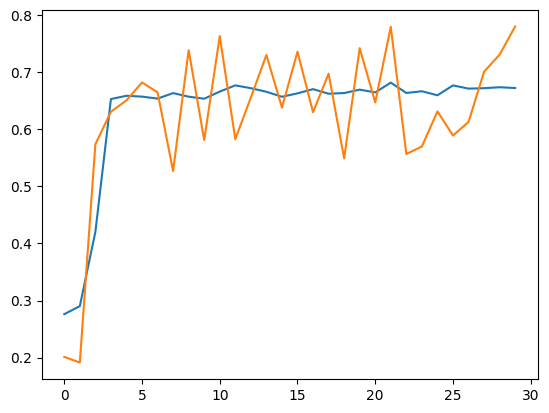

In [29]:
df=pd.DataFrame(history.history)
plt.plot(df['Accuracy'])
plt.plot(df['val_Accuracy'])

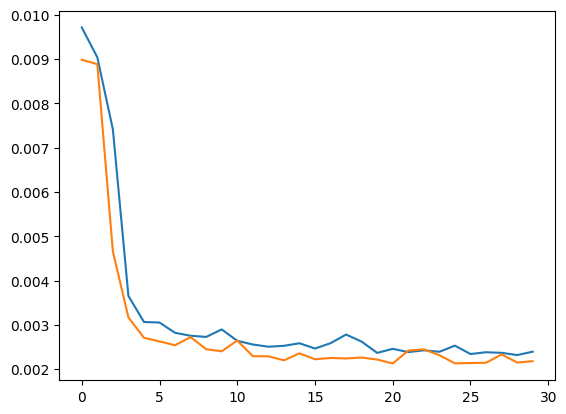

In [28]:
plt.plot(df['loss'])
plt.plot(df['val_loss'])

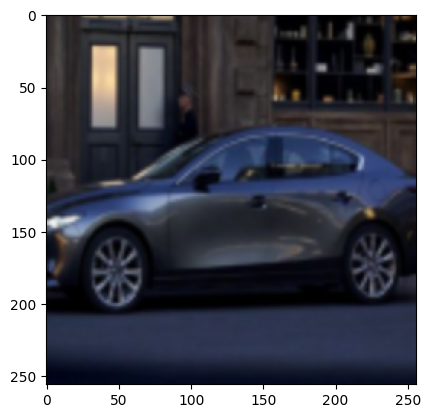

In [11]:
plt.imshow(low_t[0])

1/1 [==============================] - 0s 77ms/step


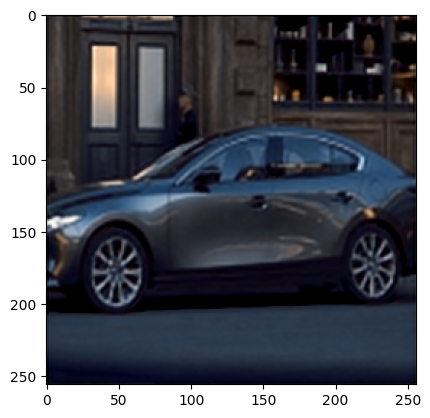

In [24]:
img=srcnn.predict(np.expand_dims(low_t[0], axis=0))
plt.imshow(img[0])